**DRIVE MOUNT**

In [ ]:
#Mounting Google Drive in Colab notebook
from google.colab import drive
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import datetime
import pytz

london_timezone = pytz.timezone('Europe/London')
current_time_london = datetime.datetime.now(london_timezone)
print("Current Date and Time in London:", current_time_london.strftime("%Y-%m-%d %H:%M:%S %Z"))

Current Date and Time in London: 2023-12-09 08:58:33 GMT


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Dec  9 08:58:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**LIBRARY IMPORTS**

In [ ]:
pip uninstall tensorflow

Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.14.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.14.0


In [ ]:
pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 56.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ten

In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.1


In [ ]:
from numpy.random import seed

# Ignore specific warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Importing Basic Libaries for Data Load and Image Movement
import os
import pandas as pd
import numpy as np
import itertools
import shutil

#Tensorflow libraries
import tensorflow
tensorflow.random.set_seed(101)

#libraries to build neural network models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,GlobalAveragePooling2D
from keras import backend as k

from keras.utils import to_categorical
from keras import optimizers
from keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.utils import img_to_array,array_to_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger
from tensorflow.keras import regularizers

#Model Libraries:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.efficientnet  import preprocess_input

#Split and Importing evaluation libraries
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix, roc_curve, auc,classification_report,balanced_accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

#Plotting Graphs:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**DIRECTORIES CREATION**

In [ ]:
# Creating new directory for file movement:
skin_eff_base_dir = 'skin_eff_base_dir'
os.mkdir(skin_eff_base_dir)

In [ ]:
# Generate a pathway leading to the 'skin_eff_base_dir' to which we will append the names of the new folders
# Training Directory creation
train_dir = os.path.join(skin_eff_base_dir, 'train_dir')
os.mkdir(train_dir)

# Validation Directory creation
val_dir = os.path.join(skin_eff_base_dir, 'val_dir')
os.mkdir(val_dir)

# Test Directory creation
test_dir = os.path.join(skin_eff_base_dir, 'test_dir')
os.mkdir(test_dir)

In [ ]:
# Creation of new folders inside Training Directory
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)

In [ ]:
# Creation of new folders inside Validation Directory
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)

In [ ]:
# Creation of new folders inside Test Directory
nv = os.path.join(test_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(test_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(test_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(test_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(test_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(test_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(test_dir, 'df')
os.mkdir(df)

**DATA LOAD AND ANALYSIS**

In [ ]:
#Read metadata information of HAM10000 dataset
df_data = pd.read_csv('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/HAM10000_metadata')

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [ ]:
df_data.shape

(10015, 8)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [ ]:
#HAM1000 attributes basic analysis
print('unique lesion_id records:' ,df_data.lesion_id.nunique())
print('unique image_id records:' ,df_data.image_id.nunique())
print('unique dx records:' ,df_data.dx.nunique())
print('unique dx_type records:' ,df_data.dx_type.nunique())
print('unique  age records:' ,df_data.age.nunique())
print('unique  sex records:' ,df_data.sex.nunique())
print('unique  localization records:' ,df_data.localization.nunique())
print('unique   dataset records:' ,df_data. dataset.nunique())

unique lesion_id records: 7470
unique image_id records: 10015
unique dx records: 7
unique dx_type records: 4
unique  age records: 18
unique  sex records: 3
unique  localization records: 15
unique   dataset records: 4


In [ ]:
#HAM10000 dataset value counts
column_list=['dx','dx_type','age','sex','localization','dataset']
for column in column_list:
    print(f"Value counts for '{column}':")
    print(df_data[column].value_counts())
    print("\n")

Value counts for 'dx':
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


Value counts for 'dx_type':
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64


Value counts for 'age':
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: age, dtype: int64


Value counts for 'sex':
male       5406
female     4552
unknown      57
Name: sex, dtype: int64


Value counts for 'localization':
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  

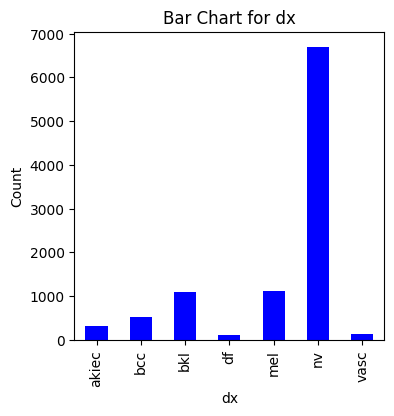

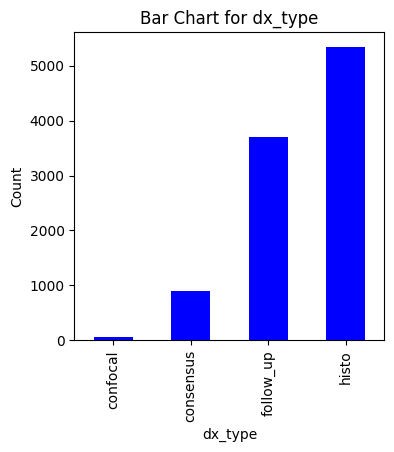

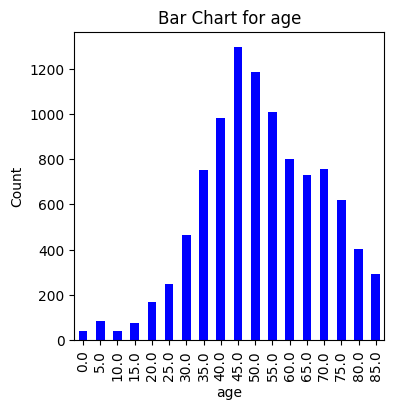

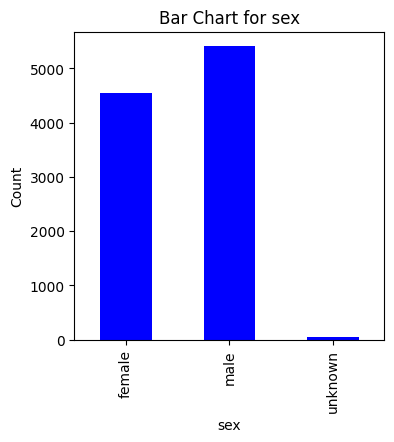

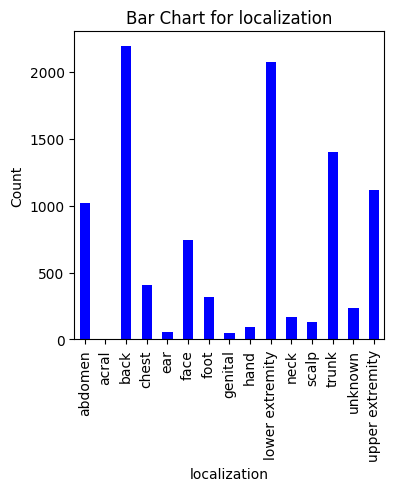

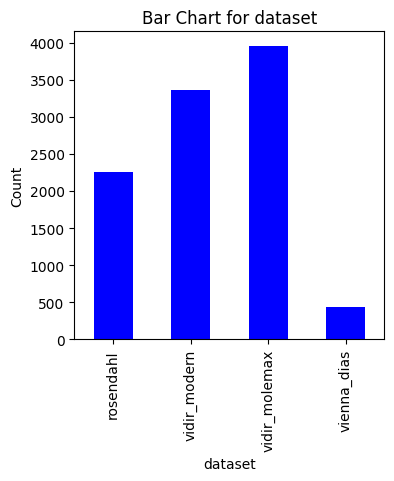

In [ ]:
# HAM10000 dataset visualization of variables
for column in column_list:
    plt.figure(figsize=(4, 4))
    df_data[column].value_counts().sort_index().plot(kind='bar', color='blue')
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [ ]:
#Sorting the dataset based on Lesion_Id
df_data = df_data.sort_values(by='lesion_id')

In [ ]:
# Train , Test and Validation Split Ratio
train_ratio = 0.7  # 70% of the data for training
test_ratio = 0.15  # 15% of the data for testing
val_ratio = 0.15   # 15% of the data for validation

In [ ]:
# Split the DataFrame into train, test, and validation sets
df_train, test_val_df = train_test_split(df_data, test_size=(test_ratio + val_ratio), random_state=42)
df_test, df_val = train_test_split(test_val_df, test_size=(val_ratio / (test_ratio + val_ratio)), random_state=42)


In [ ]:
#Length of Data Frame
print('Length of df_train:',len(df_train))
print('Length of df_val:',len(df_val))
print('Length of df_test:',len(df_test))

Length of df_train: 7010
Length of df_val: 1503
Length of df_test: 1502


In [ ]:
#Training set unique class values
df_train['dx'].value_counts()

nv       4647
bkl       799
mel       790
bcc       362
akiec     228
vasc      100
df         84
Name: dx, dtype: int64

In [ ]:
#Validation set unique class values
df_val['dx'].value_counts()

nv       1015
mel       182
bkl       151
bcc        70
akiec      54
vasc       18
df         13
Name: dx, dtype: int64

In [ ]:
#Test set unique class values
df_test['dx'].value_counts()

nv       1043
bkl       149
mel       141
bcc        82
akiec      45
vasc       24
df         18
Name: dx, dtype: int64

In [ ]:
# Get a list of images from HAM folder in Google Drive
folder = os.listdir('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES')

# Get a list of train ,test and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])
test_list = list(df_test['image_id'])

In [ ]:
#Moving the images from google dir to train_dir
for image in train_list:

    fname = image + '.jpg'
    #label = df_data.loc[image,'dx']
    label=df_data.loc[df_data['image_id'] == image, 'dx'].values[0]


    if fname in folder:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
#Moving the images from google dir to val_dir
for image in val_list:

    fname = image + '.jpg'
    #label = df_data.loc[image,'dx']
    label=df_data.loc[df_data['image_id'] == image, 'dx'].values[0]

    if fname in folder:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
#Moving the images from google dir to test_dir
for image in test_list:

    fname = image + '.jpg'
    #label = df_data.loc[image,'dx']
    label=df_data.loc[df_data['image_id'] == image, 'dx'].values[0]

    if fname in folder:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES', fname)
        # destination path to image
        dst = os.path.join(test_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
# Determine the count of training images present in each directory.

print('nv:',len(os.listdir('skin_eff_base_dir/train_dir/nv')))
print('mel:',len(os.listdir('skin_eff_base_dir/train_dir/mel')))
print('bkl:',len(os.listdir('skin_eff_base_dir/train_dir/bkl')))
print('bcc:',len(os.listdir('skin_eff_base_dir/train_dir/bcc')))
print('akiec:',len(os.listdir('skin_eff_base_dir/train_dir/akiec')))
print('vasc:',len(os.listdir('skin_eff_base_dir/train_dir/vasc')))
print('df:',len(os.listdir('skin_eff_base_dir/train_dir/df')))

nv: 4647
mel: 790
bkl: 799
bcc: 362
akiec: 228
vasc: 100
df: 84


In [ ]:
# Determine the count of val images present in each directory.

print('nv:',len(os.listdir('skin_eff_base_dir/val_dir/nv')))
print('mel:',len(os.listdir('skin_eff_base_dir/val_dir/mel')))
print('bkl:',len(os.listdir('skin_eff_base_dir/val_dir/bkl')))
print('bcc:',len(os.listdir('skin_eff_base_dir/val_dir/bcc')))
print('akiec:',len(os.listdir('skin_eff_base_dir/val_dir/akiec')))
print('vasc:',len(os.listdir('skin_eff_base_dir/val_dir/vasc')))
print('df:',len(os.listdir('skin_eff_base_dir/val_dir/df')))

nv: 1015
mel: 182
bkl: 151
bcc: 70
akiec: 54
vasc: 18
df: 13


In [ ]:
# Check how many test images we have in each folder.

print('nv:',len(os.listdir('skin_eff_base_dir/test_dir/nv')))
print('mel:',len(os.listdir('skin_eff_base_dir/test_dir/mel')))
print('bkl:',len(os.listdir('skin_eff_base_dir/test_dir/bkl')))
print('bcc:',len(os.listdir('skin_eff_base_dir/test_dir/bcc')))
print('akiec:',len(os.listdir('skin_eff_base_dir/test_dir/akiec')))
print('vasc:',len(os.listdir('skin_eff_base_dir/test_dir/vasc')))
print('df:',len(os.listdir('skin_eff_base_dir/test_dir/df')))

nv: 1043
mel: 141
bkl: 149
bcc: 82
akiec: 45
vasc: 24
df: 18


In [ ]:
#Copy the train images into skin_eff_aug_dir
class_list = ['mel','bkl','bcc','akiec','vasc','df']

for item in class_list:

    # We are creating temporary directories
    # create a aug dir
    skin_eff_aug_dir = 'skin_eff_aug_dir'
    os.mkdir(skin_eff_aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(skin_eff_aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir('skin_eff_base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir e.g. class 'mel'
    for fname in img_list:
            # source path to image
            src = os.path.join('skin_eff_base_dir/train_dir/' + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = skin_eff_aug_dir
    save_path = 'skin_eff_base_dir/train_dir/' + img_class

    # Create a data generator skin ui
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(224,224),
                                                    batch_size=batch_size)

    num_aug_images_wanted = 4500 # total number of images  in each class

    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create augmented images
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)

    # delete temporary directory with the raw image files
    shutil.rmtree('skin_eff_aug_dir')

Found 790 images belonging to 1 classes.
Found 799 images belonging to 1 classes.
Found 362 images belonging to 1 classes.
Found 228 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 84 images belonging to 1 classes.


In [ ]:
# Determine the count of training images present in each directory.

print('nv:',len(os.listdir('skin_eff_base_dir/train_dir/nv')))
print('mel:',len(os.listdir('skin_eff_base_dir/train_dir/mel')))
print('bkl:',len(os.listdir('skin_eff_base_dir/train_dir/bkl')))
print('bcc:',len(os.listdir('skin_eff_base_dir/train_dir/bcc')))
print('akiec:',len(os.listdir('skin_eff_base_dir/train_dir/akiec')))
print('vasc:',len(os.listdir('skin_eff_base_dir/train_dir/vasc')))
print('df:',len(os.listdir('skin_eff_base_dir/train_dir/df')))

nv: 4647
mel: 4500
bkl: 4545
bcc: 4132
akiec: 4154
vasc: 4500
df: 3830


In [ ]:
# Determine the count of val images present in each directory.

print('nv:',len(os.listdir('skin_eff_base_dir/val_dir/nv')))
print('mel:',len(os.listdir('skin_eff_base_dir/val_dir/mel')))
print('bkl:',len(os.listdir('skin_eff_base_dir/val_dir/bkl')))
print('bcc:',len(os.listdir('skin_eff_base_dir/val_dir/bcc')))
print('akiec:',len(os.listdir('skin_eff_base_dir/val_dir/akiec')))
print('vasc:',len(os.listdir('skin_eff_base_dir/val_dir/vasc')))
print('df:',len(os.listdir('skin_eff_base_dir/val_dir/df')))

nv: 1015
mel: 182
bkl: 151
bcc: 70
akiec: 54
vasc: 18
df: 13


In [ ]:
# Check how many test images we have in each folder.

print('nv:',len(os.listdir('skin_eff_base_dir/test_dir/nv')))
print('mel:',len(os.listdir('skin_eff_base_dir/test_dir/mel')))
print('bkl:',len(os.listdir('skin_eff_base_dir/test_dir/bkl')))
print('bcc:',len(os.listdir('skin_eff_base_dir/test_dir/bcc')))
print('akiec:',len(os.listdir('skin_eff_base_dir/test_dir/akiec')))
print('vasc:',len(os.listdir('skin_eff_base_dir/test_dir/vasc')))
print('df:',len(os.listdir('skin_eff_base_dir/test_dir/df')))

nv: 1043
mel: 141
bkl: 149
bcc: 82
akiec: 45
vasc: 24
df: 18


**IMAGE GENERATOR STEPS**

In [ ]:
#Prepare for Generator steps

train_path = 'skin_eff_base_dir/train_dir'
valid_path = 'skin_eff_base_dir/val_dir'
test_path='skin_eff_base_dir/test_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
num_test_samples = len(df_test)
train_batch_size = 10
val_batch_size = 10
test_batch_size = 10

image_size = 224

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)
test_steps = np.ceil(num_test_samples / test_batch_size)

In [ ]:
#Data Generator Preprocessing and creating train,test and validation batches
datagen = ImageDataGenerator(
    preprocessing_function= \
    tensorflow.keras.applications.efficientnet.preprocess_input)

train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=train_batch_size,class_mode='categorical')

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=val_batch_size,class_mode='categorical')

test_batches = datagen.flow_from_directory(test_path,
                                            target_size=(image_size,image_size),
                                            batch_size=test_batch_size,
                                            shuffle=False,class_mode='categorical')

Found 30308 images belonging to 7 classes.
Found 1503 images belonging to 7 classes.
Found 1502 images belonging to 7 classes.


**MODEL BUILDING**

**#Iteration 1:**

In [ ]:
##############################################################################################################

In [ ]:
eff_model = Sequential()
pretrained_model=EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

eff_model.add(pretrained_model)
eff_model.add(Flatten())
eff_model.add(Dense(512, activation='relu'))
eff_model.add(Dense(7, activation='softmax'))

258076736/258076736 [==============================] - 11s 0us/step


In [ ]:
eff_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/1_best_model_EFFNETB7.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=eff_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 176s 210ms/step - loss: 1.2833 - accuracy: 0.5418 - val_loss: 0.9018 - val_accuracy: 0.6893
Epoch 2/30
701/701 [==============================] - 121s 173ms/step - loss: 0.9713 - accuracy: 0.6348 - val_loss: 0.8572 - val_accuracy: 0.7199
Epoch 3/30
701/701 [==============================] - 114s 162ms/step - loss: 0.8971 - accuracy: 0.6611 - val_loss: 0.8200 - val_accuracy: 0.7192
Epoch 4/30
701/701 [==============================] - 120s 171ms/step - loss: 0.8146 - accuracy: 0.6932 - val_loss: 0.7393 - val_accuracy: 0.7458
Epoch 5/30
701/701 [==============================] - 115s 164ms/step - loss: 0.7555 - accuracy: 0.7120 - val_loss: 0.7137 - val_accuracy: 0.7432
Epoch 6/30
701/701 [==============================] - 120s 172ms/step - loss: 0.7048 - accuracy: 0.7229 - val_loss: 0.7003 - val_accuracy: 0.7572
Epoch 7/30
701/701 [==============================] - 113s 161ms/step - loss: 0.6809 - accuracy: 0.7331 - val_loss: 0.8539 -

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = eff_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 24s 123ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 12   6   9   4   9   5   0]
 [  7  22  13   6  12  20   2]
 [  2   2  65   1  36  43   0]
 [  0   1   1   5   0  11   0]
 [  1   3  17   1  56  61   2]
 [  1   6  23   3  58 950   2]
 [  0   0   0   0   2   6  16]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.52      0.27      0.35        45
         bcc       0.55      0.27      0.36        82
         bkl       0.51      0.44      0.47       149
          df       0.25      0.28      0.26        18
         mel       0.32      0.40      0.36       141
          nv       0.87      0.91      0.89      1043
        vasc       0.73      0.67      0.70        24

    accuracy                           0.75      1502
   macro avg       0.54      0.46      0.48      1502
weighted avg       0.74      0.75      0.74      1502



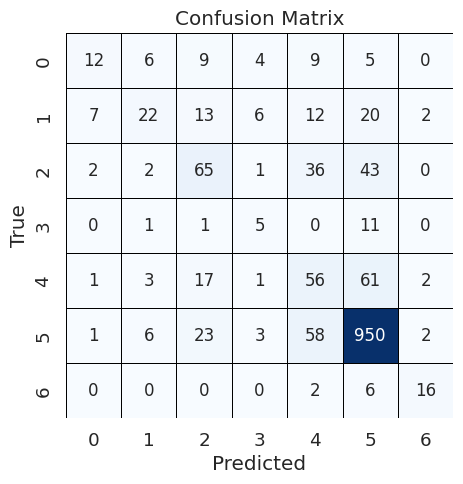

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

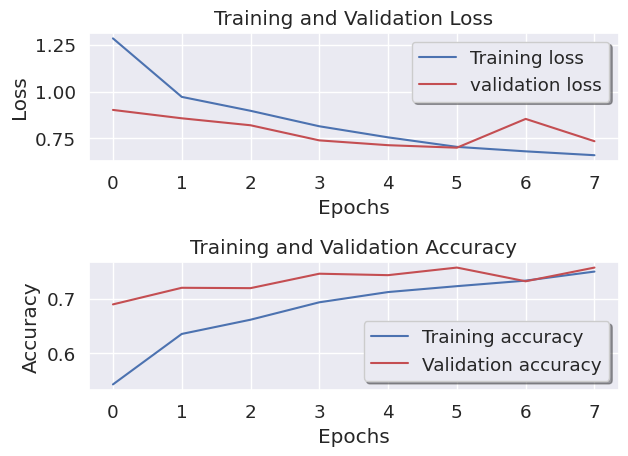

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
eff_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/1_best_model_EFFNETB7.h5')
results = eff_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = eff_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 19s 123ms/step - loss: 0.6885 - accuracy: 0.7497
 validation loss and accuracy are [0.6884861588478088, 0.7496671080589294]
0.6884861588478088 Test accuracy: 0.7497


In [ ]:
column_names = ['Train_Loss', 'Train_Accuracy', 'Val_Loss','Val_Accuracy','Test_Loss','Test_Accuracy']
df_model = pd.DataFrame(columns=column_names)

In [ ]:
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy


In [ ]:
history.history['accuracy'][-1]

0.7497860193252563

In [ ]:
    train_loss = history.history['loss'][-1]
    train_accuracy = history.history['accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

In [ ]:
print(train_loss,train_accuracy,val_loss,val_accuracy,test_loss,test_accuracy)

0.6603098511695862 0.7497860193252563 0.7349044680595398 0.7571523785591125 0.6884861588478088 0.7496671080589294


In [ ]:
# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)

In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)

In [ ]:
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.66031,0.749786,0.734904,0.757152,0.688486,0.749667


**#Iteration 2:**

In [ ]:
##############################################################################################################

In [ ]:
eff_model = Sequential()
pretrained_model=EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

eff_model.add(pretrained_model)
eff_model.add(Flatten())
eff_model.add(Dense(512, activation='relu'))
eff_model.add(Dropout(0.2))
eff_model.add(Dense(7, activation='softmax'))

In [ ]:
eff_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/2_best_model_EFFNETB7.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=eff_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 172s 217ms/step - loss: 1.4664 - accuracy: 0.4919 - val_loss: 0.8442 - val_accuracy: 0.7039
Epoch 2/30
701/701 [==============================] - 122s 174ms/step - loss: 1.0978 - accuracy: 0.5826 - val_loss: 0.7818 - val_accuracy: 0.7172
Epoch 3/30
701/701 [==============================] - 113s 161ms/step - loss: 1.0105 - accuracy: 0.6190 - val_loss: 0.7974 - val_accuracy: 0.7053
Epoch 4/30
701/701 [==============================] - 124s 176ms/step - loss: 0.9809 - accuracy: 0.6260 - val_loss: 0.7508 - val_accuracy: 0.7259
Epoch 5/30
701/701 [==============================] - 123s 175ms/step - loss: 0.9160 - accuracy: 0.6439 - val_loss: 0.7347 - val_accuracy: 0.7425
Epoch 6/30
701/701 [==============================] - 113s 161ms/step - loss: 0.8552 - accuracy: 0.6699 - val_loss: 0.7825 - val_accuracy: 0.7226
Epoch 7/30
701/701 [==============================] - 123s 175ms/step - loss: 0.8399 - accuracy: 0.6838 - val_loss: 0.7339 -

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = eff_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 23s 118ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 18   6   5   9   2   5   0]
 [  6  31   8  17   1  17   2]
 [  9   6  67   8  21  37   1]
 [  1   0   0   8   0   9   0]
 [  4   8  17   6  27  79   0]
 [  3   4  26  16  20 971   3]
 [  0   0   2   0   0   6  16]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.44      0.40      0.42        45
         bcc       0.56      0.38      0.45        82
         bkl       0.54      0.45      0.49       149
          df       0.12      0.44      0.20        18
         mel       0.38      0.19      0.25       141
          nv       0.86      0.93      0.90      1043
        vasc       0.73      0.67      0.70        24

    accuracy                           0.76      1502
   macro avg       0.52      0.49      0.49      1502
weighted avg       0.75      0.76      0.75      1502



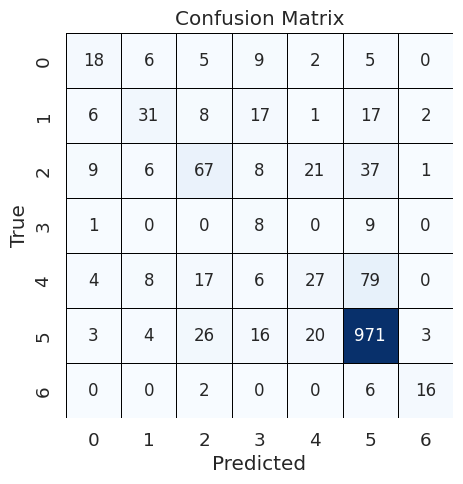

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

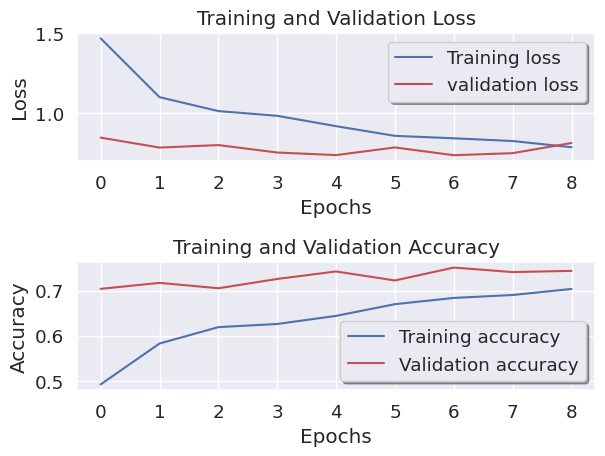

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
eff_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/2_best_model_EFFNETB7.h5')
results = eff_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = eff_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 19s 123ms/step - loss: 0.6788 - accuracy: 0.7577
 validation loss and accuracy are [0.6787978410720825, 0.757656455039978]
0.6787978410720825 Test accuracy: 0.7577


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.784078,0.703709,0.810545,0.743846,0.678798,0.757656


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.660310,0.749786,0.734904,0.757152,0.688486,0.749667
1,0.784078,0.703709,0.810545,0.743846,0.678798,0.757656


**#Iteration 3:**

In [ ]:
##############################################################################################################

In [ ]:
eff_model = Sequential()
pretrained_model=EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

eff_model.add(pretrained_model)
eff_model.add(Flatten())
eff_model.add(Dense(512, activation='relu'))
eff_model.add(Dropout(0.5))
eff_model.add(Dense(7, activation='softmax'))

In [ ]:
eff_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/3_best_model_EFFNETB7.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=eff_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 165s 208ms/step - loss: 1.7092 - accuracy: 0.4200 - val_loss: 0.8614 - val_accuracy: 0.7013
Epoch 2/30
701/701 [==============================] - 122s 175ms/step - loss: 1.3443 - accuracy: 0.4897 - val_loss: 0.8574 - val_accuracy: 0.7019
Epoch 3/30
701/701 [==============================] - 114s 162ms/step - loss: 1.2972 - accuracy: 0.5050 - val_loss: 0.8029 - val_accuracy: 0.6973
Epoch 4/30
701/701 [==============================] - 123s 176ms/step - loss: 1.2420 - accuracy: 0.5271 - val_loss: 0.8033 - val_accuracy: 0.7159
Epoch 5/30
701/701 [==============================] - 114s 162ms/step - loss: 1.1725 - accuracy: 0.5462 - val_loss: 0.8381 - val_accuracy: 0.7152
Epoch 5: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = eff_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 23s 119ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  7   7  14   6   4   7   0]
 [  4   8  21  15   7  26   1]
 [  3   2  72   2  20  48   2]
 [  0   0   1   7   3   7   0]
 [  2   2  20   6  49  60   2]
 [  4   4  33   9  74 919   0]
 [  0   2   2   0   1   7  12]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.35      0.16      0.22        45
         bcc       0.32      0.10      0.15        82
         bkl       0.44      0.48      0.46       149
          df       0.16      0.39      0.22        18
         mel       0.31      0.35      0.33       141
          nv       0.86      0.88      0.87      1043
        vasc       0.71      0.50      0.59        24

    accuracy                           0.72      1502
   macro avg       0.45      0.41      0.40      1502
weighted avg       0.71      0.72      0.71      1502



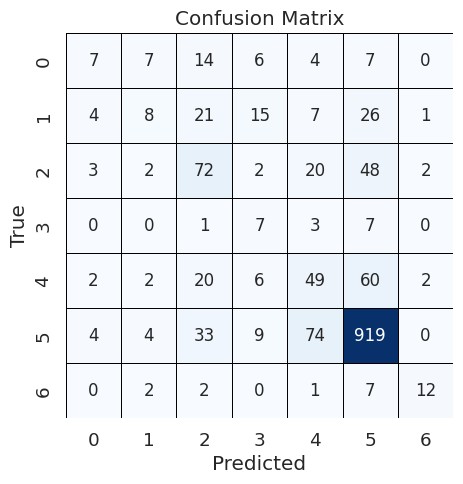

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

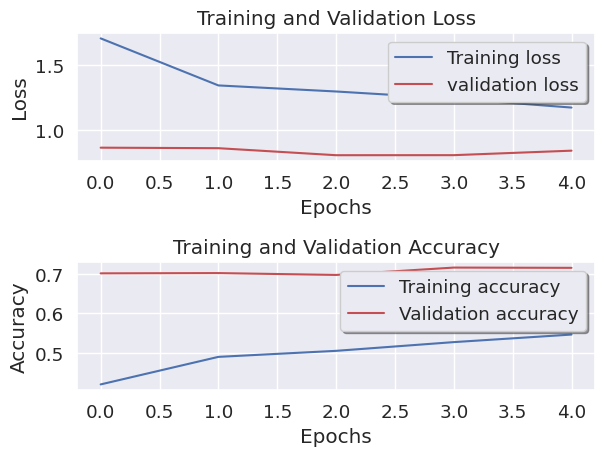

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
eff_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/3_best_model_EFFNETB7.h5')
results = eff_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = eff_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 19s 124ms/step - loss: 0.7820 - accuracy: 0.7270
 validation loss and accuracy are [0.7819928526878357, 0.7270306348800659]
0.7819928526878357 Test accuracy: 0.7270


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,1.172526,0.54622,0.838138,0.715236,0.781993,0.727031


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.660310,0.749786,0.734904,0.757152,0.688486,0.749667
1,0.784078,0.703709,0.810545,0.743846,0.678798,0.757656
2,1.172526,0.546220,0.838138,0.715236,0.781993,0.727031


**#Iteration 4:**

In [ ]:
##############################################################################################################

In [ ]:
eff_model = Sequential()
pretrained_model=EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

eff_model.add(pretrained_model)
eff_model.add(GlobalAveragePooling2D())
eff_model.add(Dense(512, activation='relu'))
eff_model.add(Dense(7, activation='softmax'))

In [ ]:
eff_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/4_best_model_EFFNETB7.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=eff_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 143s 174ms/step - loss: 1.1557 - accuracy: 0.5675 - val_loss: 0.7786 - val_accuracy: 0.7239
Epoch 2/30
701/701 [==============================] - 107s 152ms/step - loss: 0.9497 - accuracy: 0.6409 - val_loss: 0.7537 - val_accuracy: 0.7086
Epoch 3/30
701/701 [==============================] - 110s 158ms/step - loss: 0.8674 - accuracy: 0.6718 - val_loss: 0.7363 - val_accuracy: 0.7319
Epoch 4/30
701/701 [==============================] - 110s 157ms/step - loss: 0.7966 - accuracy: 0.6996 - val_loss: 0.7171 - val_accuracy: 0.7532
Epoch 5/30
701/701 [==============================] - 110s 157ms/step - loss: 0.7714 - accuracy: 0.7126 - val_loss: 0.6905 - val_accuracy: 0.7565
Epoch 6/30
701/701 [==============================] - 107s 152ms/step - loss: 0.7450 - accuracy: 0.7222 - val_loss: 0.6807 - val_accuracy: 0.7532
Epoch 7/30
701/701 [==============================] - 110s 157ms/step - loss: 0.7189 - accuracy: 0.7316 - val_loss: 0.6594 -

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = eff_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 23s 117ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 19   7   9   2   3   5   0]
 [  2  32  16   5   5  18   4]
 [  3   6  79   2  24  32   3]
 [  0   1   2   5   1   9   0]
 [  0   5  22   1  57  55   1]
 [  5   4  28   5  44 954   3]
 [  0   0   2   0   0   6  16]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.66      0.42      0.51        45
         bcc       0.58      0.39      0.47        82
         bkl       0.50      0.53      0.51       149
          df       0.25      0.28      0.26        18
         mel       0.43      0.40      0.41       141
          nv       0.88      0.91      0.90      1043
        vasc       0.59      0.67      0.63        24

    accuracy                           0.77      1502
   macro avg       0.56      0.52      0.53      1502
weighted avg       0.77      0.77      0.77      1502



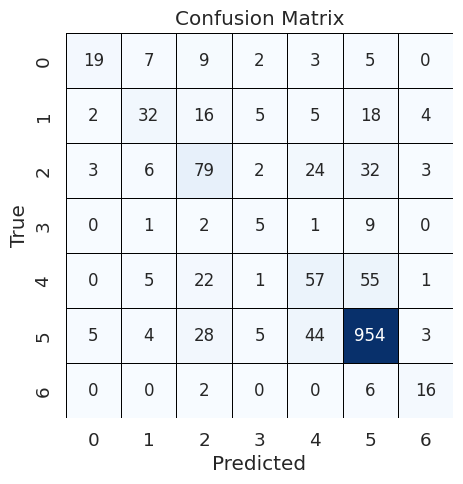

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

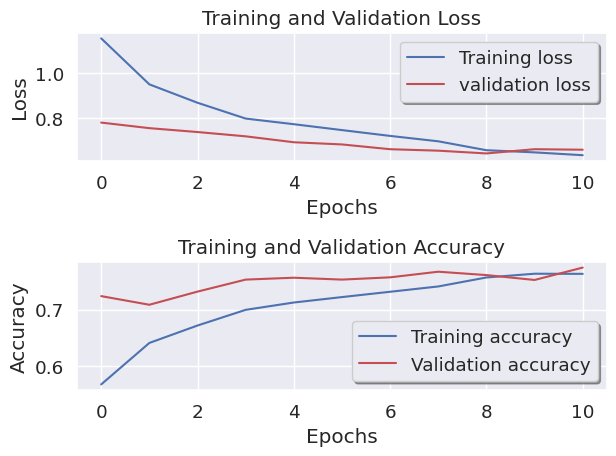

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
eff_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/4_best_model_EFFNETB7.h5')
results = eff_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = eff_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 19s 123ms/step - loss: 0.6384 - accuracy: 0.7743
 validation loss and accuracy are [0.6384122371673584, 0.7743009328842163]
0.6384122371673584 Test accuracy: 0.7743


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.632532,0.763338,0.657114,0.774451,0.638412,0.774301


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.660310,0.749786,0.734904,0.757152,0.688486,0.749667
1,0.784078,0.703709,0.810545,0.743846,0.678798,0.757656
2,1.172526,0.546220,0.838138,0.715236,0.781993,0.727031
3,0.632532,0.763338,0.657114,0.774451,0.638412,0.774301


**#Iteration 5:**

In [ ]:
##############################################################################################################

In [ ]:
eff_model = Sequential()
pretrained_model=EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=True

eff_model.add(pretrained_model)
eff_model.add(GlobalAveragePooling2D())
eff_model.add(Dense(512, activation='relu'))
eff_model.add(Dense(7, activation='softmax'))

In [ ]:
eff_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/5_best_model_EFFNETB7.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=eff_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 511s 675ms/step - loss: 0.8513 - accuracy: 0.6852 - val_loss: 0.6209 - val_accuracy: 0.7552
Epoch 2/30
701/701 [==============================] - 448s 639ms/step - loss: 0.4845 - accuracy: 0.8304 - val_loss: 0.5317 - val_accuracy: 0.8064
Epoch 3/30
701/701 [==============================] - 448s 639ms/step - loss: 0.3540 - accuracy: 0.8720 - val_loss: 0.5154 - val_accuracy: 0.8117
Epoch 4/30
701/701 [==============================] - 449s 641ms/step - loss: 0.2726 - accuracy: 0.9015 - val_loss: 0.5160 - val_accuracy: 0.8250
Epoch 5/30
701/701 [==============================] - 449s 640ms/step - loss: 0.2379 - accuracy: 0.9171 - val_loss: 0.5364 - val_accuracy: 0.8263
Epoch 5: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = eff_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 23s 117ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 25   1   6   1   5   6   1]
 [  4  59   3   0   6   7   3]
 [  1   1 103   1  18  25   0]
 [  1   0   0  14   0   3   0]
 [  2   3  13   1  76  46   0]
 [  2   9  25   1  53 951   2]
 [  0   0   0   0   0   1  23]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.71      0.56      0.63        45
         bcc       0.81      0.72      0.76        82
         bkl       0.69      0.69      0.69       149
          df       0.78      0.78      0.78        18
         mel       0.48      0.54      0.51       141
          nv       0.92      0.91      0.91      1043
        vasc       0.79      0.96      0.87        24

    accuracy                           0.83      1502
   macro avg       0.74      0.74      0.73      1502
weighted avg       0.84      0.83      0.83      1502



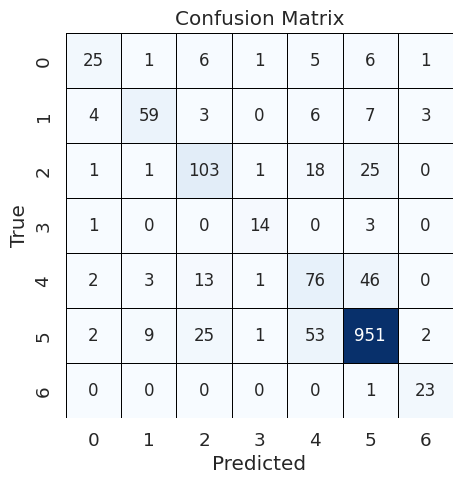

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

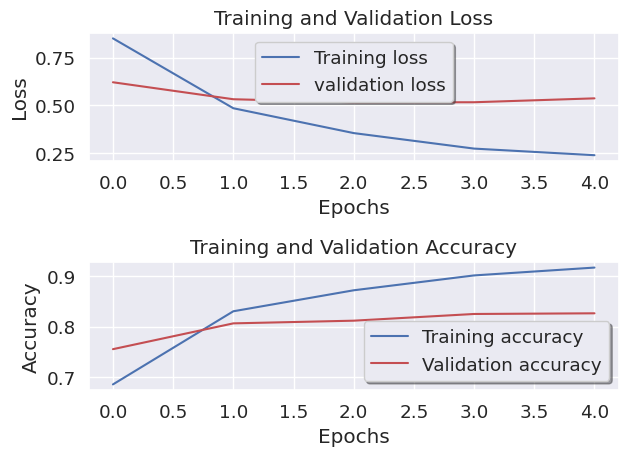

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
eff_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/5_best_model_EFFNETB7.h5')
results = eff_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = eff_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 19s 124ms/step - loss: 0.5396 - accuracy: 0.8282
 validation loss and accuracy are [0.5395964980125427, 0.8282290101051331]
0.5395964980125427 Test accuracy: 0.8282


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.237861,0.917118,0.536401,0.826347,0.539596,0.828229


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.660310,0.749786,0.734904,0.757152,0.688486,0.749667
1,0.784078,0.703709,0.810545,0.743846,0.678798,0.757656
2,1.172526,0.546220,0.838138,0.715236,0.781993,0.727031
3,0.632532,0.763338,0.657114,0.774451,0.638412,0.774301
4,0.237861,0.917118,0.536401,0.826347,0.539596,0.828229


**#Iteration 6:**

In [ ]:
##############################################################################################################

In [ ]:
eff_model = Sequential()
pretrained_model=EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

eff_model.add(pretrained_model)
eff_model.add(GlobalAveragePooling2D())
eff_model.add(Dense(512, activation='relu'))
eff_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(lr=0.00001, momentum=0.9, nesterov=True)

eff_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/6_best_model_EFFNETB7.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=eff_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 140s 171ms/step - loss: 1.9616 - accuracy: 0.1703 - val_loss: 1.9896 - val_accuracy: 0.0971
Epoch 2/30
701/701 [==============================] - 110s 157ms/step - loss: 1.9091 - accuracy: 0.2315 - val_loss: 1.8817 - val_accuracy: 0.2595
Epoch 3/30
701/701 [==============================] - 111s 159ms/step - loss: 1.8638 - accuracy: 0.2906 - val_loss: 1.7902 - val_accuracy: 0.4578
Epoch 4/30
701/701 [==============================] - 111s 158ms/step - loss: 1.8195 - accuracy: 0.3612 - val_loss: 1.6952 - val_accuracy: 0.5749
Epoch 5/30
701/701 [==============================] - 110s 157ms/step - loss: 1.7809 - accuracy: 0.3910 - val_loss: 1.6151 - val_accuracy: 0.6188
Epoch 6/30
701/701 [==============================] - 110s 157ms/step - loss: 1.7454 - accuracy: 0.4183 - val_loss: 1.5484 - val_accuracy: 0.6387
Epoch 7/30
701/701 [==============================] - 110s 157ms/step - loss: 1.7109 - accuracy: 0.4401 - val_loss: 1.4962 -

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = eff_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 23s 117ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  2   2   4   6   2  29   0]
 [  1   0   5   6   4  63   3]
 [  0   0  38   4  18  85   4]
 [  0   0   0   6   2  10   0]
 [  1   0   9   4  32  94   1]
 [  1   0  33   8  49 941  11]
 [  0   0   0   1   0  12  11]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.40      0.04      0.08        45
         bcc       0.00      0.00      0.00        82
         bkl       0.43      0.26      0.32       149
          df       0.17      0.33      0.23        18
         mel       0.30      0.23      0.26       141
          nv       0.76      0.90      0.83      1043
        vasc       0.37      0.46      0.41        24

    accuracy                           0.69      1502
   macro avg       0.35      0.32      0.30      1502
weighted avg       0.62      0.69      0.64      1502



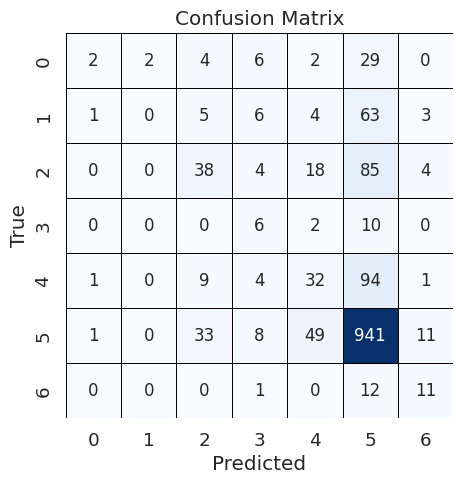

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

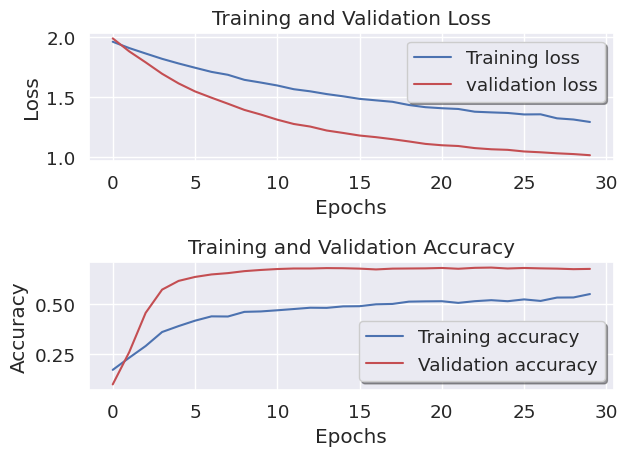

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
eff_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/6_best_model_EFFNETB7.h5')
results = eff_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = eff_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 19s 122ms/step - loss: 1.0548 - accuracy: 0.6897
 validation loss and accuracy are [1.0548053979873657, 0.6897469758987427]
1.0548053979873657 Test accuracy: 0.6897


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,1.294216,0.552511,1.017771,0.679308,1.054805,0.689747


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.660310,0.749786,0.734904,0.757152,0.688486,0.749667
1,0.784078,0.703709,0.810545,0.743846,0.678798,0.757656
2,1.172526,0.546220,0.838138,0.715236,0.781993,0.727031
3,0.632532,0.763338,0.657114,0.774451,0.638412,0.774301
4,0.237861,0.917118,0.536401,0.826347,0.539596,0.828229
5,1.294216,0.552511,1.017771,0.679308,1.054805,0.689747


**#Iteration 7:**

In [ ]:
##############################################################################################################

In [ ]:
eff_model = Sequential()
pretrained_model=EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

eff_model.add(pretrained_model)
eff_model.add(GlobalAveragePooling2D())
eff_model.add(Dense(512, activation='relu', input_dim=(224,224,3)))
eff_model.add(Dropout(0.3))
eff_model.add(Dense(512, activation='relu'))
eff_model.add(Dropout(0.3))
eff_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(lr=0.00001, momentum=0.9, nesterov=True)

eff_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/7_best_model_EFFNETB7.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=eff_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 143s 176ms/step - loss: 1.9628 - accuracy: 0.1618 - val_loss: 1.8728 - val_accuracy: 0.4451
Epoch 2/30
701/701 [==============================] - 113s 161ms/step - loss: 1.9345 - accuracy: 0.1964 - val_loss: 1.8345 - val_accuracy: 0.5303
Epoch 3/30
701/701 [==============================] - 111s 158ms/step - loss: 1.9133 - accuracy: 0.2167 - val_loss: 1.7957 - val_accuracy: 0.5842
Epoch 4/30
701/701 [==============================] - 111s 158ms/step - loss: 1.8942 - accuracy: 0.2375 - val_loss: 1.7568 - val_accuracy: 0.6134
Epoch 5/30
701/701 [==============================] - 111s 159ms/step - loss: 1.8707 - accuracy: 0.2648 - val_loss: 1.7193 - val_accuracy: 0.6327
Epoch 6/30
701/701 [==============================] - 111s 158ms/step - loss: 1.8584 - accuracy: 0.2844 - val_loss: 1.6794 - val_accuracy: 0.6440
Epoch 7/30
701/701 [==============================] - 111s 158ms/step - loss: 1.8406 - accuracy: 0.3023 - val_loss: 1.6413 -

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = eff_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 23s 117ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  3   0   7   6   1  28   0]
 [  1   1   3   7   4  63   3]
 [  1   0  24   4  12 106   2]
 [  0   0   1   4   1  12   0]
 [  0   0  12   0  19 106   4]
 [  1   1  25   4  28 977   7]
 [  0   0   0   0   0  17   7]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.50      0.07      0.12        45
         bcc       0.50      0.01      0.02        82
         bkl       0.33      0.16      0.22       149
          df       0.16      0.22      0.19        18
         mel       0.29      0.13      0.18       141
          nv       0.75      0.94      0.83      1043
        vasc       0.30      0.29      0.30        24

    accuracy                           0.69      1502
   macro avg       0.41      0.26      0.27      1502
weighted avg       0.63      0.69      0.63      1502



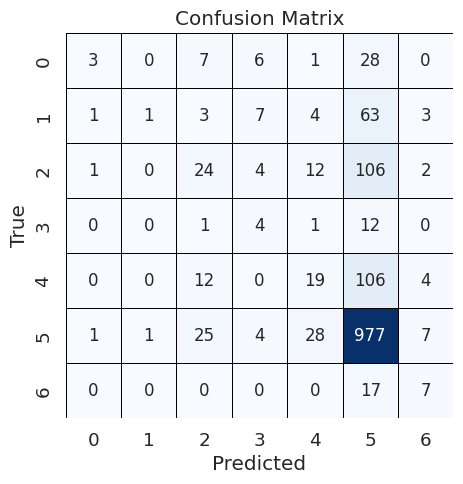

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

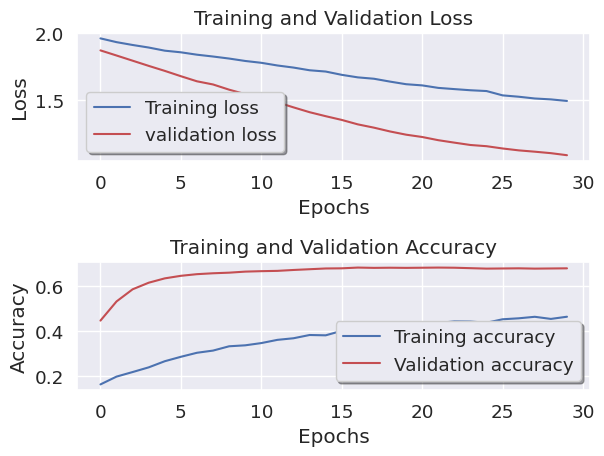

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
eff_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/7_best_model_EFFNETB7.h5')
results = eff_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = eff_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 19s 122ms/step - loss: 1.3073 - accuracy: 0.6871
 validation loss and accuracy are [1.3073399066925049, 0.687083899974823]
1.3073399066925049 Test accuracy: 0.6871


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,1.494219,0.46234,1.0879,0.677312,1.30734,0.687084


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.660310,0.749786,0.734904,0.757152,0.688486,0.749667
1,0.784078,0.703709,0.810545,0.743846,0.678798,0.757656
2,1.172526,0.546220,0.838138,0.715236,0.781993,0.727031
3,0.632532,0.763338,0.657114,0.774451,0.638412,0.774301
4,0.237861,0.917118,0.536401,0.826347,0.539596,0.828229
5,1.294216,0.552511,1.017771,0.679308,1.054805,0.689747
6,1.494219,0.462340,1.087900,0.677312,1.307340,0.687084


**#Iteration 8:**

In [ ]:
##############################################################################################################

In [ ]:
eff_model = Sequential()
pretrained_model=EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

eff_model.add(pretrained_model)
eff_model.add(Flatten())
eff_model.add(Dense(224, activation='relu'))
eff_model.add(Dense(7, activation='softmax'))

In [ ]:
eff_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/8_best_model_EFFNETB7.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=eff_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 139s 167ms/step - loss: 1.2598 - accuracy: 0.5391 - val_loss: 0.9129 - val_accuracy: 0.6680
Epoch 2/30
701/701 [==============================] - 117s 167ms/step - loss: 0.9890 - accuracy: 0.6315 - val_loss: 0.7976 - val_accuracy: 0.7332
Epoch 3/30
701/701 [==============================] - 117s 166ms/step - loss: 0.8986 - accuracy: 0.6695 - val_loss: 0.7769 - val_accuracy: 0.7339
Epoch 4/30
701/701 [==============================] - 117s 167ms/step - loss: 0.8084 - accuracy: 0.7016 - val_loss: 0.7443 - val_accuracy: 0.7399
Epoch 5/30
701/701 [==============================] - 108s 154ms/step - loss: 0.7723 - accuracy: 0.7119 - val_loss: 0.7780 - val_accuracy: 0.7246
Epoch 6/30
701/701 [==============================] - 118s 168ms/step - loss: 0.7189 - accuracy: 0.7292 - val_loss: 0.7969 - val_accuracy: 0.7405
Epoch 6: early stopping


In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = eff_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 23s 118ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 24   4   7   2   5   3   0]
 [ 19  13  13   4  10  20   3]
 [  9   2  87   1  25  24   1]
 [  3   0   0   4   3   7   1]
 [  3   5  24   0  62  45   2]
 [  6   4  56   1  87 886   3]
 [  1   0   1   0   1   4  17]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.37      0.53      0.44        45
         bcc       0.46      0.16      0.24        82
         bkl       0.46      0.58      0.52       149
          df       0.33      0.22      0.27        18
         mel       0.32      0.44      0.37       141
          nv       0.90      0.85      0.87      1043
        vasc       0.63      0.71      0.67        24

    accuracy                           0.73      1502
   macro avg       0.50      0.50      0.48      1502
weighted avg       0.75      0.73      0.73      1502



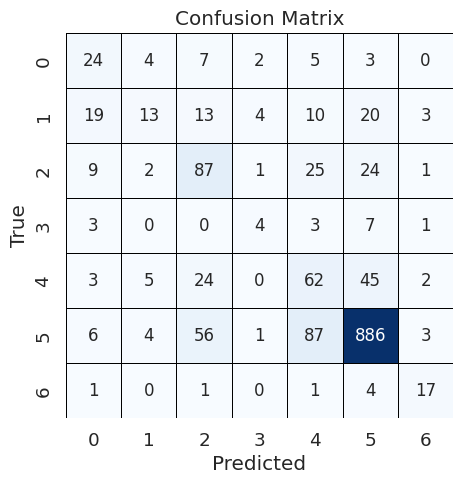

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

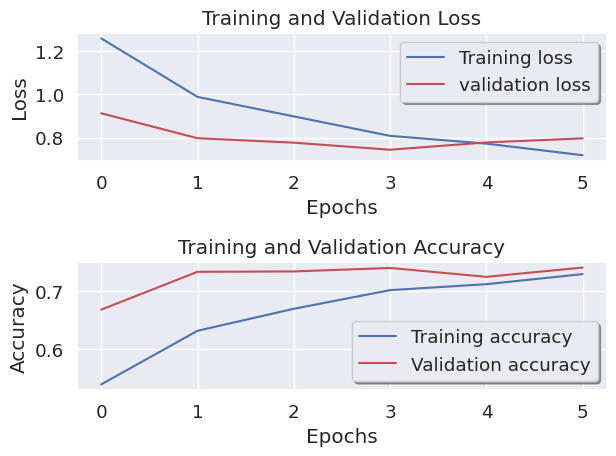

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
eff_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/8_best_model_EFFNETB7.h5')
results = eff_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = eff_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 19s 124ms/step - loss: 0.7502 - accuracy: 0.7610
 validation loss and accuracy are [0.7501526474952698, 0.7609853744506836]
0.7501526474952698 Test accuracy: 0.7610


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.718897,0.729244,0.79686,0.740519,0.750153,0.760985


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.660310,0.749786,0.734904,0.757152,0.688486,0.749667
1,0.784078,0.703709,0.810545,0.743846,0.678798,0.757656
2,1.172526,0.546220,0.838138,0.715236,0.781993,0.727031
3,0.632532,0.763338,0.657114,0.774451,0.638412,0.774301
4,0.237861,0.917118,0.536401,0.826347,0.539596,0.828229
5,1.294216,0.552511,1.017771,0.679308,1.054805,0.689747
6,1.494219,0.462340,1.087900,0.677312,1.307340,0.687084
7,0.718897,0.729244,0.796860,0.740519,0.750153,0.760985


**#Iteration 9:**

In [ ]:
##############################################################################################################

In [ ]:
eff_model = Sequential()
pretrained_model=EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

eff_model.add(pretrained_model)
eff_model.add(Flatten())
eff_model.add(Dense(224, activation='relu'))
eff_model.add(Dropout(0.2))
eff_model.add(Dense(7, activation='softmax'))

In [ ]:
eff_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/9_best_model_EFFNETB7.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=eff_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 137s 167ms/step - loss: 1.4058 - accuracy: 0.4899 - val_loss: 0.8327 - val_accuracy: 0.6926
Epoch 2/30
701/701 [==============================] - 118s 168ms/step - loss: 1.1414 - accuracy: 0.5632 - val_loss: 0.8113 - val_accuracy: 0.7053
Epoch 3/30
701/701 [==============================] - 118s 168ms/step - loss: 1.0498 - accuracy: 0.6025 - val_loss: 0.7618 - val_accuracy: 0.7226
Epoch 4/30
701/701 [==============================] - 117s 166ms/step - loss: 1.0071 - accuracy: 0.6164 - val_loss: 0.7400 - val_accuracy: 0.7385
Epoch 5/30
701/701 [==============================] - 117s 167ms/step - loss: 0.9594 - accuracy: 0.6301 - val_loss: 0.7108 - val_accuracy: 0.7412
Epoch 6/30
701/701 [==============================] - 108s 154ms/step - loss: 0.9469 - accuracy: 0.6428 - val_loss: 0.7586 - val_accuracy: 0.7206
Epoch 7/30
701/701 [==============================] - 108s 155ms/step - loss: 0.9000 - accuracy: 0.6516 - val_loss: 0.7067 -

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = eff_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 25s 118ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 14   5  17   2   2   5   0]
 [  8  29  10   9  11  14   1]
 [  2   5  77   2  27  35   1]
 [  0   3   1   3   3   8   0]
 [  0   3  17   4  37  79   1]
 [  3   7  22   2  56 949   4]
 [  0   2   0   0   3   6  13]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.52      0.31      0.39        45
         bcc       0.54      0.35      0.43        82
         bkl       0.53      0.52      0.53       149
          df       0.14      0.17      0.15        18
         mel       0.27      0.26      0.26       141
          nv       0.87      0.91      0.89      1043
        vasc       0.65      0.54      0.59        24

    accuracy                           0.75      1502
   macro avg       0.50      0.44      0.46      1502
weighted avg       0.74      0.75      0.74      1502



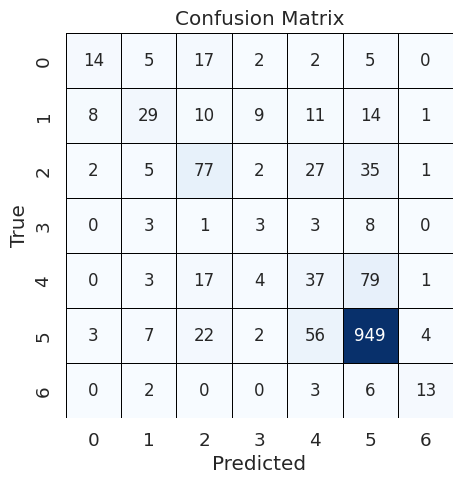

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

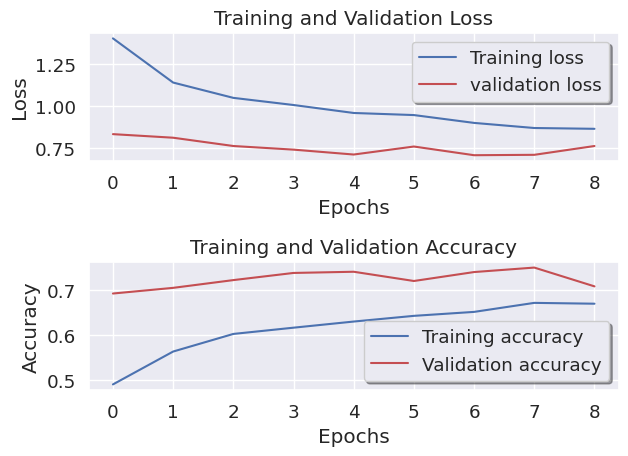

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
eff_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/9_best_model_EFFNETB7.h5')
results = eff_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = eff_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 19s 124ms/step - loss: 0.7146 - accuracy: 0.7490
 validation loss and accuracy are [0.7145891189575195, 0.7490013241767883]
0.7145891189575195 Test accuracy: 0.7490


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.864625,0.6699,0.761703,0.708583,0.714589,0.749001


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.660310,0.749786,0.734904,0.757152,0.688486,0.749667
1,0.784078,0.703709,0.810545,0.743846,0.678798,0.757656
2,1.172526,0.546220,0.838138,0.715236,0.781993,0.727031
3,0.632532,0.763338,0.657114,0.774451,0.638412,0.774301
4,0.237861,0.917118,0.536401,0.826347,0.539596,0.828229
5,1.294216,0.552511,1.017771,0.679308,1.054805,0.689747
6,1.494219,0.462340,1.087900,0.677312,1.307340,0.687084
7,0.718897,0.729244,0.796860,0.740519,0.750153,0.760985
8,0.864625,0.669900,0.761703,0.708583,0.714589,0.749001


**#Iteration 10:**

In [ ]:
##############################################################################################################

In [ ]:
eff_model = Sequential()
pretrained_model=EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

eff_model.add(pretrained_model)
eff_model.add(Flatten())
eff_model.add(Dense(224, activation='relu'))
eff_model.add(Dropout(0.5))
eff_model.add(Dense(7, activation='softmax'))

In [ ]:
eff_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/10_best_model_EFFNETB7.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=eff_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 138s 169ms/step - loss: 1.7020 - accuracy: 0.3733 - val_loss: 0.8992 - val_accuracy: 0.6933
Epoch 2/30
701/701 [==============================] - 108s 154ms/step - loss: 1.4626 - accuracy: 0.4312 - val_loss: 0.8999 - val_accuracy: 0.6574
Epoch 3/30
701/701 [==============================] - 108s 155ms/step - loss: 1.3795 - accuracy: 0.4595 - val_loss: 0.8420 - val_accuracy: 0.6913
Epoch 4/30
701/701 [==============================] - 118s 168ms/step - loss: 1.3220 - accuracy: 0.4732 - val_loss: 0.8585 - val_accuracy: 0.7212
Epoch 5/30
701/701 [==============================] - 108s 154ms/step - loss: 1.2707 - accuracy: 0.4940 - val_loss: 0.8165 - val_accuracy: 0.7106
Epoch 6/30
701/701 [==============================] - 108s 155ms/step - loss: 1.2538 - accuracy: 0.5067 - val_loss: 0.8087 - val_accuracy: 0.7086
Epoch 7/30
701/701 [==============================] - 108s 154ms/step - loss: 1.2142 - accuracy: 0.5117 - val_loss: 0.8559 -

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = eff_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 23s 118ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 19   4   6   5   7   4   0]
 [ 12  16   8   9   4  28   5]
 [  7   1  40   1  29  69   2]
 [  1   2   0   5   2   8   0]
 [  5   3   9   3  21  99   1]
 [  3   5  18   0  28 987   2]
 [  0   0   1   0   0   6  17]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.40      0.42      0.41        45
         bcc       0.52      0.20      0.28        82
         bkl       0.49      0.27      0.35       149
          df       0.22      0.28      0.24        18
         mel       0.23      0.15      0.18       141
          nv       0.82      0.95      0.88      1043
        vasc       0.63      0.71      0.67        24

    accuracy                           0.74      1502
   macro avg       0.47      0.42      0.43      1502
weighted avg       0.69      0.74      0.70      1502



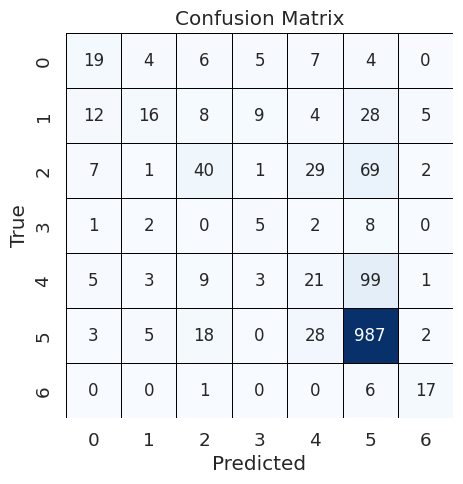

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

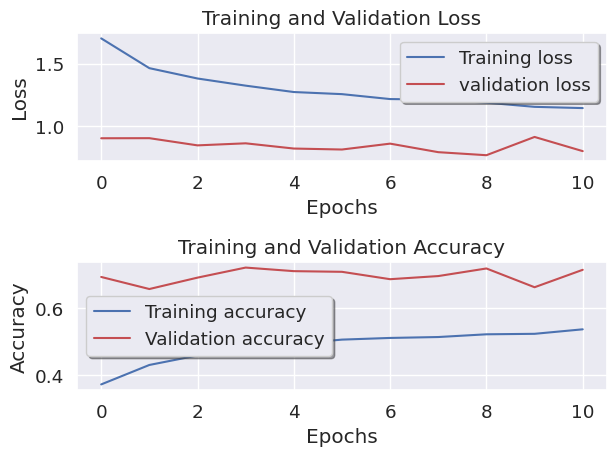

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
eff_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/10_best_model_EFFNETB7.h5')
results = eff_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = eff_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 19s 123ms/step - loss: 0.8453 - accuracy: 0.7284
 validation loss and accuracy are [0.8452658653259277, 0.7283622026443481]
0.8452658653259277 Test accuracy: 0.7284


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,1.141662,0.537375,0.795654,0.714571,0.845266,0.728362


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.660310,0.749786,0.734904,0.757152,0.688486,0.749667
1,0.784078,0.703709,0.810545,0.743846,0.678798,0.757656
2,1.172526,0.546220,0.838138,0.715236,0.781993,0.727031
3,0.632532,0.763338,0.657114,0.774451,0.638412,0.774301
4,0.237861,0.917118,0.536401,0.826347,0.539596,0.828229
5,1.294216,0.552511,1.017771,0.679308,1.054805,0.689747
6,1.494219,0.462340,1.087900,0.677312,1.307340,0.687084
7,0.718897,0.729244,0.796860,0.740519,0.750153,0.760985
8,0.864625,0.669900,0.761703,0.708583,0.714589,0.749001
9,1.141662,0.537375,0.795654,0.714571,0.845266,0.728362


**#Iteration 11:**

In [ ]:
##############################################################################################################

In [ ]:
eff_model = Sequential()
pretrained_model=EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

eff_model.add(pretrained_model)
eff_model.add(GlobalAveragePooling2D())
eff_model.add(Dense(224, activation='relu'))
eff_model.add(Dense(7, activation='softmax'))

In [ ]:
eff_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/11_best_model_EFFNETB7.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=eff_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 137s 163ms/step - loss: 1.2269 - accuracy: 0.5427 - val_loss: 0.7677 - val_accuracy: 0.7246
Epoch 2/30
701/701 [==============================] - 107s 153ms/step - loss: 0.9764 - accuracy: 0.6281 - val_loss: 0.7301 - val_accuracy: 0.7199
Epoch 3/30
701/701 [==============================] - 110s 157ms/step - loss: 0.8947 - accuracy: 0.6671 - val_loss: 0.7351 - val_accuracy: 0.7285
Epoch 4/30
701/701 [==============================] - 110s 157ms/step - loss: 0.8332 - accuracy: 0.6865 - val_loss: 0.6954 - val_accuracy: 0.7372
Epoch 5/30
701/701 [==============================] - 110s 157ms/step - loss: 0.8194 - accuracy: 0.6933 - val_loss: 0.6783 - val_accuracy: 0.7472
Epoch 6/30
701/701 [==============================] - 107s 152ms/step - loss: 0.7925 - accuracy: 0.6993 - val_loss: 0.7310 - val_accuracy: 0.7372
Epoch 7/30
701/701 [==============================] - 111s 158ms/step - loss: 0.7514 - accuracy: 0.7187 - val_loss: 0.7154 -

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = eff_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 23s 117ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[ 13   6   9   2   4  11   0]
 [  2  30   9   4   5  31   1]
 [  1   2  51   1  31  62   1]
 [  0   0   2   2   0  14   0]
 [  2   5  11   1  46  75   1]
 [  2   9  12   1  41 976   2]
 [  0   1   0   0   1   9  13]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.65      0.29      0.40        45
         bcc       0.57      0.37      0.44        82
         bkl       0.54      0.34      0.42       149
          df       0.18      0.11      0.14        18
         mel       0.36      0.33      0.34       141
          nv       0.83      0.94      0.88      1043
        vasc       0.72      0.54      0.62        24

    accuracy                           0.75      1502
   macro avg       0.55      0.42      0.46      1502
weighted avg       0.73      0.75      0.73      1502



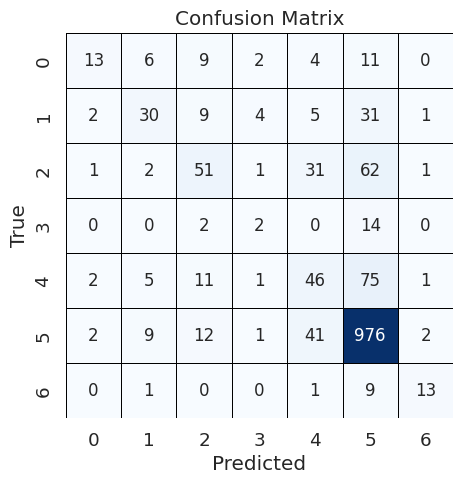

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

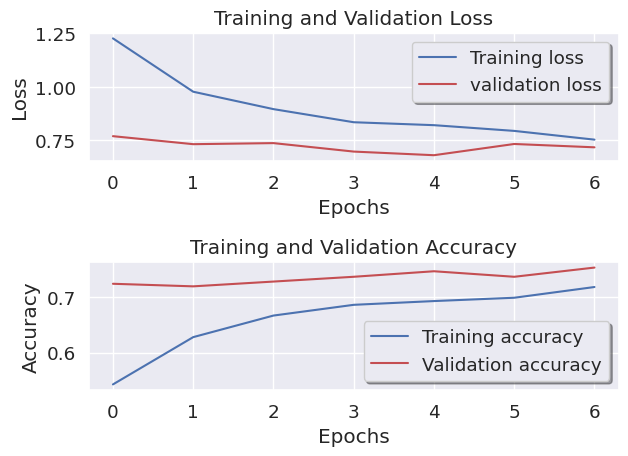

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
eff_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/11_best_model_EFFNETB7.h5')
results = eff_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = eff_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 19s 123ms/step - loss: 0.6805 - accuracy: 0.7643
 validation loss and accuracy are [0.6804502606391907, 0.7643142342567444]
0.6804502606391907 Test accuracy: 0.7643


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.751427,0.718688,0.715372,0.753826,0.68045,0.764314


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.660310,0.749786,0.734904,0.757152,0.688486,0.749667
1,0.784078,0.703709,0.810545,0.743846,0.678798,0.757656
2,1.172526,0.546220,0.838138,0.715236,0.781993,0.727031
3,0.632532,0.763338,0.657114,0.774451,0.638412,0.774301
4,0.237861,0.917118,0.536401,0.826347,0.539596,0.828229
5,1.294216,0.552511,1.017771,0.679308,1.054805,0.689747
6,1.494219,0.462340,1.087900,0.677312,1.307340,0.687084
7,0.718897,0.729244,0.796860,0.740519,0.750153,0.760985
8,0.864625,0.669900,0.761703,0.708583,0.714589,0.749001
9,1.141662,0.537375,0.795654,0.714571,0.845266,0.728362


**#Iteration 12:**

In [ ]:
##############################################################################################################

In [ ]:
eff_model = Sequential()
pretrained_model=EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=True

eff_model.add(pretrained_model)
eff_model.add(GlobalAveragePooling2D())
eff_model.add(Dense(224, activation='relu'))
eff_model.add(Dense(7, activation='softmax'))

In [ ]:
eff_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/12_best_model_EFFNETB7.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=eff_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 484s 639ms/step - loss: 0.8569 - accuracy: 0.6876 - val_loss: 0.6028 - val_accuracy: 0.7758
Epoch 2/30
701/701 [==============================] - 449s 641ms/step - loss: 0.4820 - accuracy: 0.8245 - val_loss: 0.5884 - val_accuracy: 0.7898
Epoch 3/30
701/701 [==============================] - 449s 640ms/step - loss: 0.3655 - accuracy: 0.8696 - val_loss: 0.6579 - val_accuracy: 0.8071
Epoch 4/30
701/701 [==============================] - 449s 640ms/step - loss: 0.3022 - accuracy: 0.8910 - val_loss: 0.5607 - val_accuracy: 0.8164
Epoch 5/30
701/701 [==============================] - 436s 622ms/step - loss: 0.2559 - accuracy: 0.9111 - val_loss: 0.5498 - val_accuracy: 0.8150
Epoch 6/30
701/701 [==============================] - 449s 640ms/step - loss: 0.2224 - accuracy: 0.9174 - val_loss: 0.4758 - val_accuracy: 0.8383
Epoch 7/30
701/701 [==============================] - 436s 621ms/step - loss: 0.1648 - accuracy: 0.9412 - val_loss: 0.5318 -

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = eff_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 23s 117ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  23   14    7    0    0    1    0]
 [   1   61    4    1    2   13    0]
 [   4    1  101    1    4   38    0]
 [   1    1    1   12    0    3    0]
 [   3    5    7    0   46   80    0]
 [   1    6   11    3   22 1000    0]
 [   0    1    0    0    0    4   19]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.70      0.51      0.59        45
         bcc       0.69      0.74      0.71        82
         bkl       0.77      0.68      0.72       149
          df       0.71      0.67      0.69        18
         mel       0.62      0.33      0.43       141
          nv       0.88      0.96      0.92      1043
        vasc       1.00      0.79      0.88        24

    accuracy                           0.84      1502
   macro avg       0.77      0.67      0.71      1502
weighted avg       0.83      0.84      0.83      1502



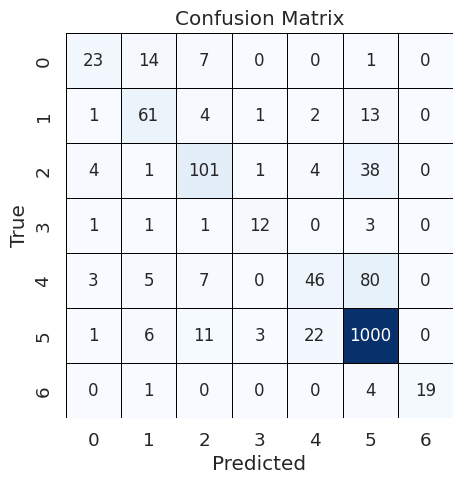

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

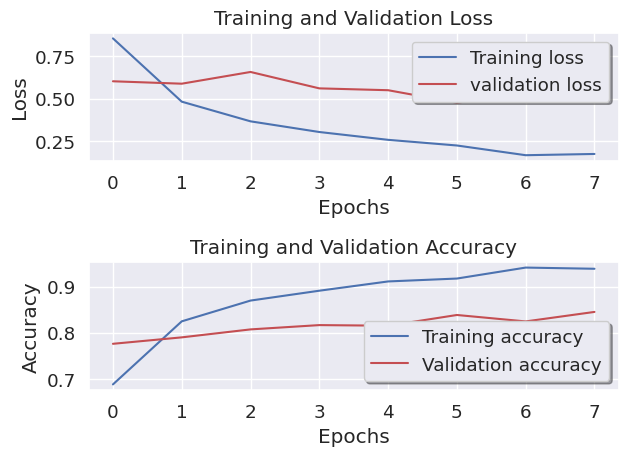

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
eff_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/12_best_model_EFFNETB7.h5')
results = eff_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = eff_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 19s 124ms/step - loss: 0.5151 - accuracy: 0.8489
 validation loss and accuracy are [0.5151476263999939, 0.848868191242218]
0.5151476263999939 Test accuracy: 0.8489


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.172176,0.938642,0.511115,0.844977,0.515148,0.848868


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.660310,0.749786,0.734904,0.757152,0.688486,0.749667
1,0.784078,0.703709,0.810545,0.743846,0.678798,0.757656
2,1.172526,0.546220,0.838138,0.715236,0.781993,0.727031
3,0.632532,0.763338,0.657114,0.774451,0.638412,0.774301
4,0.237861,0.917118,0.536401,0.826347,0.539596,0.828229
5,1.294216,0.552511,1.017771,0.679308,1.054805,0.689747
6,1.494219,0.462340,1.087900,0.677312,1.307340,0.687084
7,0.718897,0.729244,0.796860,0.740519,0.750153,0.760985
8,0.864625,0.669900,0.761703,0.708583,0.714589,0.749001
9,1.141662,0.537375,0.795654,0.714571,0.845266,0.728362


**#Iteration 13:**

In [ ]:
##############################################################################################################

In [ ]:
eff_model = Sequential()
pretrained_model=EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

eff_model.add(pretrained_model)
eff_model.add(GlobalAveragePooling2D())
eff_model.add(Dense(224, activation='relu'))
eff_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(lr=0.00001, momentum=0.9, nesterov=True)

eff_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/13_best_model_EFFNETB7.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=eff_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 137s 164ms/step - loss: 1.9399 - accuracy: 0.1658 - val_loss: 1.9483 - val_accuracy: 0.0878
Epoch 2/30
701/701 [==============================] - 111s 158ms/step - loss: 1.8876 - accuracy: 0.2218 - val_loss: 1.8300 - val_accuracy: 0.3220
Epoch 3/30
701/701 [==============================] - 111s 158ms/step - loss: 1.8447 - accuracy: 0.2961 - val_loss: 1.7338 - val_accuracy: 0.5210
Epoch 4/30
701/701 [==============================] - 111s 158ms/step - loss: 1.8096 - accuracy: 0.3398 - val_loss: 1.6609 - val_accuracy: 0.6035
Epoch 5/30
701/701 [==============================] - 111s 158ms/step - loss: 1.7684 - accuracy: 0.3916 - val_loss: 1.5875 - val_accuracy: 0.6314
Epoch 6/30
701/701 [==============================] - 111s 158ms/step - loss: 1.7433 - accuracy: 0.4004 - val_loss: 1.5145 - val_accuracy: 0.6514
Epoch 7/30
701/701 [==============================] - 111s 158ms/step - loss: 1.7125 - accuracy: 0.4123 - val_loss: 1.4596 -

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = eff_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 23s 117ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  3   2   8   7   0  25   0]
 [  1   1  11   6   0  59   4]
 [  1   0  42   3  12  87   4]
 [  0   0   1   6   0  11   0]
 [  0   1  15   2  25  96   2]
 [  3   0  34   5  28 961  12]
 [  0   0   1   1   0  14   8]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.38      0.07      0.11        45
         bcc       0.25      0.01      0.02        82
         bkl       0.38      0.28      0.32       149
          df       0.20      0.33      0.25        18
         mel       0.38      0.18      0.24       141
          nv       0.77      0.92      0.84      1043
        vasc       0.27      0.33      0.30        24

    accuracy                           0.70      1502
   macro avg       0.37      0.30      0.30      1502
weighted avg       0.64      0.70      0.65      1502



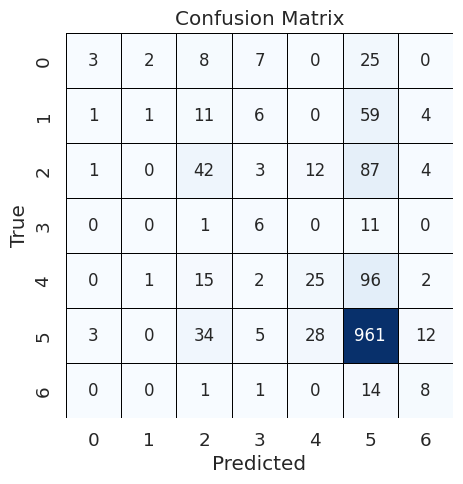

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

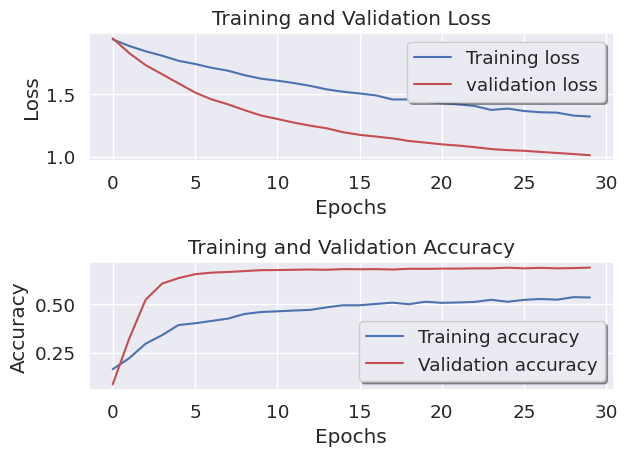

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
eff_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/13_best_model_EFFNETB7.h5')
results = eff_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = eff_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 19s 123ms/step - loss: 0.9939 - accuracy: 0.6964
 validation loss and accuracy are [0.9939128160476685, 0.6964048147201538]
0.9939128160476685 Test accuracy: 0.6964


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,1.321714,0.53224,1.011844,0.685296,0.993913,0.696405


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.660310,0.749786,0.734904,0.757152,0.688486,0.749667
1,0.784078,0.703709,0.810545,0.743846,0.678798,0.757656
2,1.172526,0.546220,0.838138,0.715236,0.781993,0.727031
3,0.632532,0.763338,0.657114,0.774451,0.638412,0.774301
4,0.237861,0.917118,0.536401,0.826347,0.539596,0.828229
5,1.294216,0.552511,1.017771,0.679308,1.054805,0.689747
6,1.494219,0.462340,1.087900,0.677312,1.307340,0.687084
7,0.718897,0.729244,0.796860,0.740519,0.750153,0.760985
8,0.864625,0.669900,0.761703,0.708583,0.714589,0.749001
9,1.141662,0.537375,0.795654,0.714571,0.845266,0.728362


**#Iteration 14:**

In [ ]:
##############################################################################################################

In [ ]:
eff_model = Sequential()
pretrained_model=EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

eff_model.add(pretrained_model)
eff_model.add(GlobalAveragePooling2D())
eff_model.add(Dense(512, activation='relu', input_dim=(224,224,3)))
eff_model.add(Dropout(0.3))
eff_model.add(Dense(224, activation='relu'))
eff_model.add(Dropout(0.3))
eff_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = SGD(lr=0.00001, momentum=0.9, nesterov=True)

eff_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/14_best_model_EFFNETB7.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
callbacks_list = [checkpoint, early_stop]

In [ ]:
#We can now use these generators to train our model.
history=eff_model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps,    #The 2 slashes division return rounded integer
        epochs=30,
        validation_data=valid_batches,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/30
701/701 [==============================] - 134s 163ms/step - loss: 2.0039 - accuracy: 0.1318 - val_loss: 1.9159 - val_accuracy: 0.1730
Epoch 2/30
701/701 [==============================] - 111s 159ms/step - loss: 1.9635 - accuracy: 0.1586 - val_loss: 1.8477 - val_accuracy: 0.3606
Epoch 3/30
701/701 [==============================] - 111s 159ms/step - loss: 1.9330 - accuracy: 0.1944 - val_loss: 1.7760 - val_accuracy: 0.5383
Epoch 4/30
701/701 [==============================] - 111s 159ms/step - loss: 1.8990 - accuracy: 0.2244 - val_loss: 1.7135 - val_accuracy: 0.6134
Epoch 5/30
701/701 [==============================] - 144s 205ms/step - loss: 1.8706 - accuracy: 0.2623 - val_loss: 1.6450 - val_accuracy: 0.6547
Epoch 6/30
701/701 [==============================] - 113s 162ms/step - loss: 1.8536 - accuracy: 0.2807 - val_loss: 1.5809 - val_accuracy: 0.6667
Epoch 7/30
701/701 [==============================] - 111s 159ms/step - loss: 1.8228 - accuracy: 0.2926 - val_loss: 1.5213 -

In [ ]:
# Evaluate the model and generate a confusion matrix
test_batches.shuffle = False  # Disable shuffling for evaluation
predictions = eff_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 23s 117ms/step


In [ ]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  1   0  11   5   3  25   0]
 [  1   0   8   5   5  60   3]
 [  0   0  41   4   7  93   4]
 [  0   0   2   4   2  10   0]
 [  0   1  22   3  17  96   2]
 [  0   1  34   6  28 970   4]
 [  0   0   1   0   0  16   7]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.50      0.02      0.04        45
         bcc       0.00      0.00      0.00        82
         bkl       0.34      0.28      0.31       149
          df       0.15      0.22      0.18        18
         mel       0.27      0.12      0.17       141
          nv       0.76      0.93      0.84      1043
        vasc       0.35      0.29      0.32        24

    accuracy                           0.69      1502
   macro avg       0.34      0.27      0.26      1502
weighted avg       0.61      0.69      0.64      1502



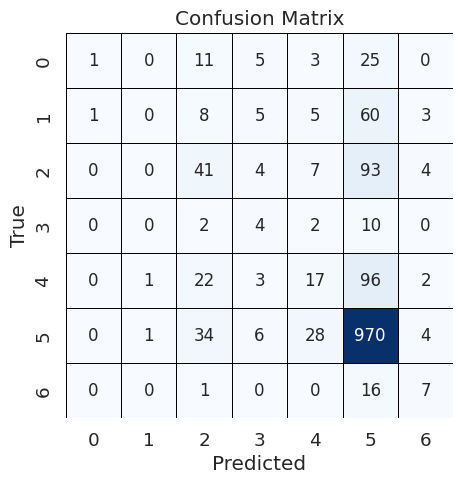

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

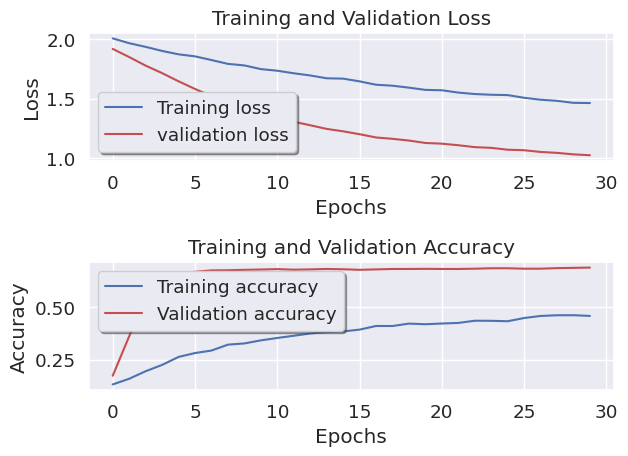

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
eff_model.load_weights('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/14_best_model_EFFNETB7.h5')
results = eff_model.evaluate(test_batches)
print(" validation loss and accuracy are", results)
test_loss, test_accuracy = eff_model.evaluate_generator(test_batches)
print(test_loss,f"Test accuracy: {test_accuracy:.4f}")

151/151 [==============================] - 19s 123ms/step - loss: 1.0093 - accuracy: 0.6924
 validation loss and accuracy are [1.0092973709106445, 0.6924101114273071]
1.0092973709106445 Test accuracy: 0.6924


In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Create a dictionary with the values
row_to_append = {
    'Train_Loss': train_loss,
    'Train_Accuracy': train_accuracy,
    'Val_Loss': val_loss,
    'Val_Accuracy': val_accuracy,
    'Test_Loss': test_loss,
    'Test_Accuracy': test_accuracy
}

new_data = pd.DataFrame([[train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy]], columns=column_names)
new_data

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,1.463269,0.457061,1.027106,0.686627,1.009297,0.69241


In [ ]:
df_model = pd.concat([df_model, new_data], ignore_index=True)
df_model

,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy,Test_Loss,Test_Accuracy
0,0.660310,0.749786,0.734904,0.757152,0.688486,0.749667
1,0.784078,0.703709,0.810545,0.743846,0.678798,0.757656
2,1.172526,0.546220,0.838138,0.715236,0.781993,0.727031
3,0.632532,0.763338,0.657114,0.774451,0.638412,0.774301
4,0.237861,0.917118,0.536401,0.826347,0.539596,0.828229
5,1.294216,0.552511,1.017771,0.679308,1.054805,0.689747
6,1.494219,0.462340,1.087900,0.677312,1.307340,0.687084
7,0.718897,0.729244,0.796860,0.740519,0.750153,0.760985
8,0.864625,0.669900,0.761703,0.708583,0.714589,0.749001
9,1.141662,0.537375,0.795654,0.714571,0.845266,0.728362


In [ ]:
import datetime
import pytz

london_timezone = pytz.timezone('Europe/London')
current_time_london = datetime.datetime.now(london_timezone)
print("Current Date and Time in London:", current_time_london.strftime("%Y-%m-%d %H:%M:%S %Z"))

Current Date and Time in London: 2023-12-09 17:05:19 GMT
